If you run this in Google Colaboraotry, install and import the required libraries. Google Colab notebooks come with many libraries preinstalled, however there are some libraries that need to be installed manually.

For text preprocessing and cleaning, I use the spacy library.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
# !pip install -q tensorflow_gpu==2.1.0
# !pip install -q ktrain
# !pip3 install -q git+https://github.com/amaiya/eli5@tfkeras_0_10_1

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import string
import re
from bs4 import BeautifulSoup
import ktrain
from ktrain import text

/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
I0827 18:28:52.518611 140492824854656 _import_c_extension.py:31] Failed to import cuda module: No module named 'caffe2.python.caffe2_pybind11_state_gpu'
I0827 18:28:52.520830 140492824854656 _import_c_extension.py:38] Failed to import AMD hip module: No module named 'caffe2.python.caffe2_pybind11_state_hip'
W0827 18:28:52.526302 140492824854656 _import_c_extension.py:41] This caffe2 python run does not have GPU support. Will run in CPU only mode.


# Basic data cleaning and data exploration before cleaning.

In [3]:
#clean data
punctuations = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '\xa0', '\t',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '\u3000', '\u202f',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '«',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

expansion_dict = {"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"couldnt" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"doesnt" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"havent" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"shouldnt" : "should not",
"that's" : "that is",
"thats" : "that is",
"there's" : "there is",
"theres" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"theyre":  "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"}

punctuations = punctuations + list(string.punctuation)
stopwords = list(STOP_WORDS)
parser = English()

In [4]:
def spacy_tokenizer(sentence):
    tokens = parser(sentence)
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
    tokens = [word for word in tokens if word not in stopwords and word not in punctuations]
    tokens = " ".join([i for i in tokens])
    return tokens

def clean_text(x):
    x = str(x).replace("\n","")
    for punct in punctuations:
        x = x.replace(punct, "")
    return x

def clean_numbers(x):
    x = re.sub('\d+', ' ', x)
    return x

def expand(text):
    mispellings_re = re.compile('(%s)' % '|'.join(expansion_dict.keys()))

    def replace(match):
        return expansion_dict[match.group(0)]

    return mispellings_re.sub(replace, text)

def remove_space(string):
    string = BeautifulSoup(string).text.strip().lower()
    string = re.sub(r'((http)\S+)', 'http', string)
    string = re.sub(r'\s+', ' ', string)
    return string

def removeurl(raw_text):
    clean_text = re.sub(r'^https?:\/\/.*[\r\n]*', '', raw_text, flags=re.MULTILINE)
    return clean_text

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
#removing url tags
train['text'] = train['text'].apply(lambda x:removeurl(x))
test['text'] = test['text'].apply(lambda x:removeurl(x))

train['text'] = train['text'].apply(lambda x:clean_text(x))
test['text'] = test['text'].apply(lambda x:clean_text(x))

train['text'] = train['text'].apply(lambda x:clean_numbers(x))
test['text'] = test['text'].apply(lambda x:clean_numbers(x))

train['text'] = train['text'].apply(lambda x:expand(x))
test['text'] = test['text'].apply(lambda x:expand(x))

train['text'] = train['text'].apply(lambda x:remove_space(x))
test['text'] = test['text'].apply(lambda x:remove_space(x))

# data cleaning - The best result is obtained without applying spacy_tokenizer
# train['text'] = train['text'].apply(lambda x:spacy_tokenizer(x))
# test['text'] = test['text'].apply(lambda x:spacy_tokenizer(x))

In [9]:
def calculate_nr_words(text):
    return len(text.split(" "))
    
print(max(train['text'].apply(calculate_nr_words)))
print(max(test['text'].apply(calculate_nr_words)))

31
31


# Model training - Using text classifiers from ktrain library.
# Best solution using bert text classifier without applying spacy_tokenizer cleaning.

In [ ]:
(x_train, y_train), (x_val, y_val), preproc = text.texts_from_df(train, 
                                                                   'text', # name of column containing review text
                                                                   label_columns=['target'],
                                                                   maxlen=32, 
                                                                   max_features=100,
                                                                   preprocess_mode='standard',
                                                                   val_pct=0.2,
                                                                   ngram_range=1)

language: en
Word Counts: 17677
Nrows: 6090
6090 train sequences
train sequence lengths:
	mean : 6
	95percentile : 12
	99percentile : 15
x_train shape: (6090,32)
y_train shape: (6090, 2)
1523 test sequences
test sequence lengths:
	mean : 6
	95percentile : 12
	99percentile : 15
x_test shape: (1523,32)
y_test shape: (1523, 2)


In [ ]:
model = text.text_classifier('standard_gru', (x_train, y_train) , preproc=preproc)
learner = ktrain.get_learner(model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_val, y_val), 
                             batch_size=64)

Is Multi-Label? False
compiling word ID features...
maxlen is 32
done.


simulating training for different learning rates... this may take a few moments...
Train on 6090 samples
Epoch 1/1024
6090/6090 [==============================] - 3s 494us/sample - loss: 0.6957 - accuracy: 0.4928
Epoch 2/1024
6090/6090 [==============================] - 1s 179us/sample - loss: 0.6942 - accuracy: 0.5072
Epoch 3/1024
6090/6090 [==============================] - 1s 177us/sample - loss: 0.6940 - accuracy: 0.5062
Epoch 4/1024
6090/6090 [==============================] - 1s 177us/sample - loss: 0.6931 - accuracy: 0.5110
Epoch 5/1024
6090/6090 [==============================] - 1s 178us/sample - loss: 0.6911 - accuracy: 0.5282
Epoch 6/1024
6090/6090 [==============================] - 1s 177us/sample - loss: 0.6880 - accuracy: 0.5506
Epoch 7/1024
6090/6090 [==============================] - 1s 179us/sample - loss: 0.6843 - accuracy: 0.5619
Epoch 8/1024
6090/6090 [==============================] - 1s 179us/sample - loss: 0.6790 - accuracy: 0.5727
Epoch 9/1024
6090/6090 [=======

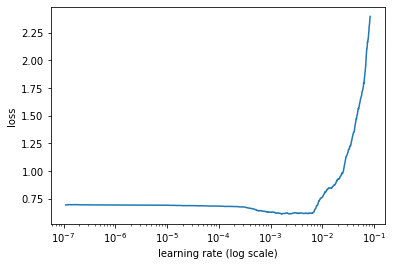

In [ ]:
learner.lr_find(show_plot=True)

In [ ]:
#learner.fit_onecycle(5e-3, 40)   
#learner.fit(0.0001, 5, cycle_len=1, cycle_mult=2)
learner.autofit(lr = 0.0001)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.0001...
Train on 6090 samples, validate on 1523 samples
Epoch 1/1024
6090/6090 [==============================] - 2s 288us/sample - loss: 0.6937 - accuracy: 0.5082 - val_loss: 0.6925 - val_accuracy: 0.5548
Epoch 2/1024
6090/6090 [==============================] - 1s 216us/sample - loss: 0.6942 - accuracy: 0.4998 - val_loss: 0.6920 - val_accuracy: 0.5739
Epoch 3/1024
6090/6090 [==============================] - 1s 215us/sample - loss: 0.6945 - accuracy: 0.4951 - val_loss: 0.6916 - val_accuracy: 0.5732
Epoch 4/1024
6090/6090 [==============================] - 1s 215us/sample - loss: 0.6926 - accuracy: 0.5161 - val_loss: 0.6912 - val_accuracy: 0.5765
Epoch 5/1024
6090/6090 [==============================] - 1s 216us/sample - loss: 0.6920 - accuracy: 0.5217 - val_loss: 0.6908 - val_accuracy: 0.5765
Epoch 6/1024
6090

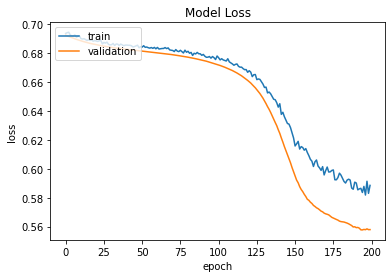

In [ ]:
learner.plot()

In [ ]:
learner.validate(class_names=[0,1]) 

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       877
           1       0.73      0.52      0.61       646

    accuracy                           0.72      1523
   macro avg       0.72      0.69      0.69      1523
weighted avg       0.72      0.72      0.71      1523



array([[756, 121],
       [311, 335]])

In [ ]:
learner.view_top_losses(n=5, preproc=preproc)

----------
id:1146 | loss:11.87 | true:0 | pred:1)

[CLS] front ##page bio ##ter ##ror lab faced secret sanctions rick ##per ##ry does not make the cut for fox ##ne ##ws go ##pd ##eb ##ate http usa ##to ##day [SEP]
----------
id:1361 | loss:11.79 | true:1 | pred:0)

[CLS] d ##mas ##sa ##5 definite triple crown threat him and harper both [SEP]
----------
id:467 | loss:11.77 | true:1 | pred:0)

[CLS] acc ##ion ##em ##pres ##a china ##u ##ª ##s stock market crash this summer has sparked interest from bargain hunt http ge ##ren ##cia ##to ##dos a [SEP]
----------
id:223 | loss:11.5 | true:1 | pred:0)

[CLS] alex ##tu ##cker volcano bowl drink [SEP]
----------
id:77 | loss:11.47 | true:1 | pred:0)

[CLS] khalid ##kka ##zi mate they ##ve taken another 2 since i posted this t ##wee ##t its pan ##de ##monium [SEP]


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc) 
predictions = predictor.predict(test['text'].tolist()) 

In [ ]:
predictor.explain("front ##page bio ##ter ##ror lab faced secret sanctions rick ##per ##ry does not make the cut for fox ##ne ##ws go ##pd ##eb ##ate http usa ##to ##day")

This code is used to create a submission file for the Kaggle competition.

In [ ]:
submission_df = pd.concat([test["id"],pd.Series(predictions, name="target")], axis=1)
submission_df.head()
submission_df.to_csv("submission.csv", index=False)